* Youtube playlist - https://www.youtube.com/playlist?list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P
* Kaggle Notebook - https://www.kaggle.com/eslam200/audio-classification-dl

### Fourier Transform
* Video - https://www.youtube.com/watch?v=Z7YM-HAz-IY&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P
* Speech Processing for Machine Learning - https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
* Discrete Cosine Transformations - http://datagenetics.com/blog/november32012/index.html
* Mel Frequency Cepstral Coefficient (MFCC) tutorial - http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

**The Fourier transform** is a mathematical operation that decomposes a function into its constituent frequencies. It is a powerful tool for signal processing, image processing, and other fields.

In simple terms, the **Fourier transform** can be thought of as a way of splitting a signal into its different sine wave components. Each sine wave component has a different frequency and amplitude. By understanding the frequency components of a signal, we can better understand the signal itself.
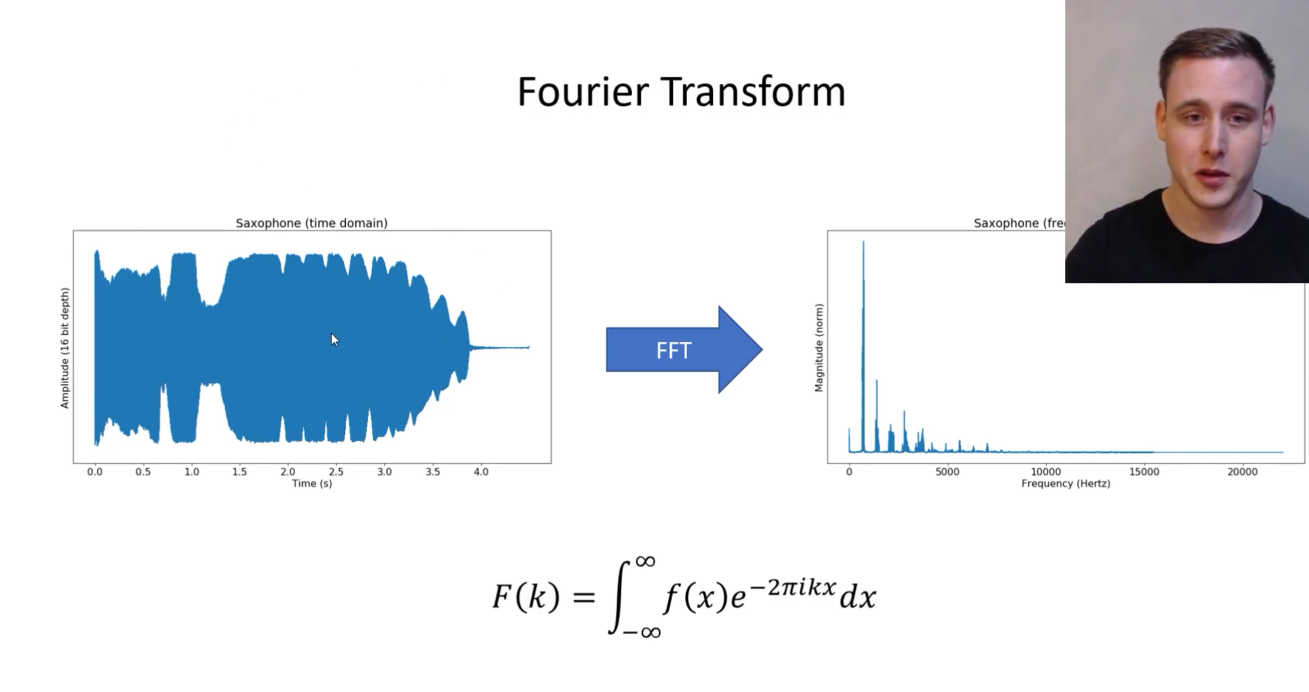

Here is a simple example of how the Fourier transform can be used. Suppose we have a signal that is a pure sine wave with a frequency of 100 Hz. The Fourier transform of this signal will be a single peak at 100 Hz. If we have a signal that is a mixture of different sine waves with different frequencies, the Fourier transform of this signal will show peaks at each of the frequencies of the sine waves in the mixture.

### Spectrogram
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

A spectrogram is typically displayed as a heatmap, with the intensity of the color representing the strength of the signal at a particular frequency and time. The horizontal axis of a spectrogram represents time, while the vertical axis represents frequency.

Spectrograms can be used to analyze a wide variety of signals, including audio signals, speech signals, seismic data, and medical images. They are particularly useful for identifying and characterizing different types of signals, as well as for detecting changes in signals over time.

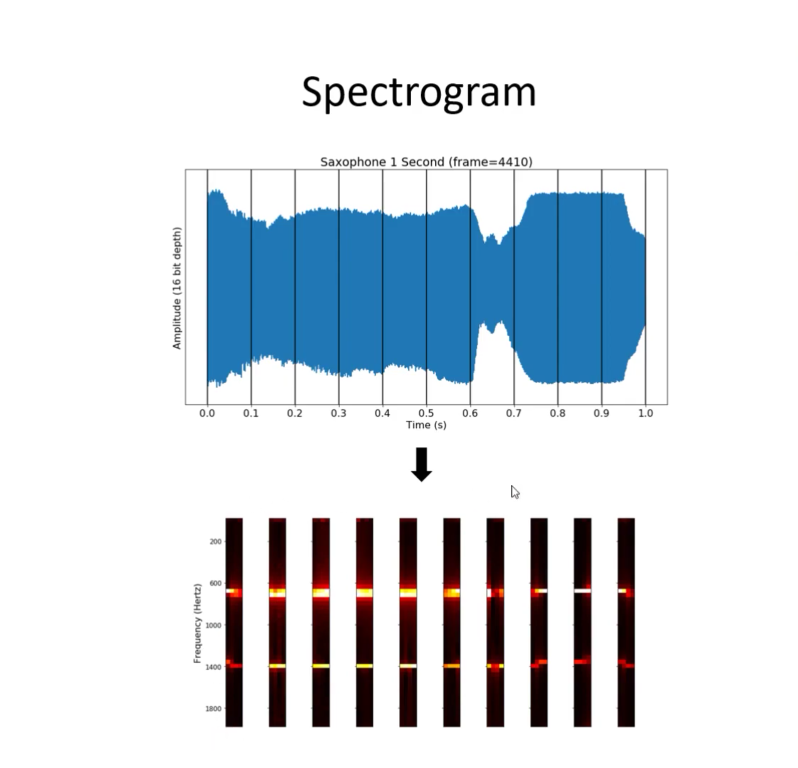

### Short-Time Fourier Transform
The Short-Time Fourier Transform (STFT) is a signal processing technique used to analyze the frequency content of a signal as it changes over time. It is a type of Fourier transform that uses a window function to divide the signal into shorter segments, and then computes the Fourier transform of each segment. This results in a two-dimensional representation of the signal, where the x-axis represents time and the y-axis represents frequency.

The STFT is a useful tool for analyzing non-stationary signals, which are signals whose frequency content changes over time. For example, the STFT can be used to analyze audio signals, such as speech or music, to identify different instruments or speakers. It can also be used to analyze other types of signals, such as vibration data or financial data, to identify patterns or trends.

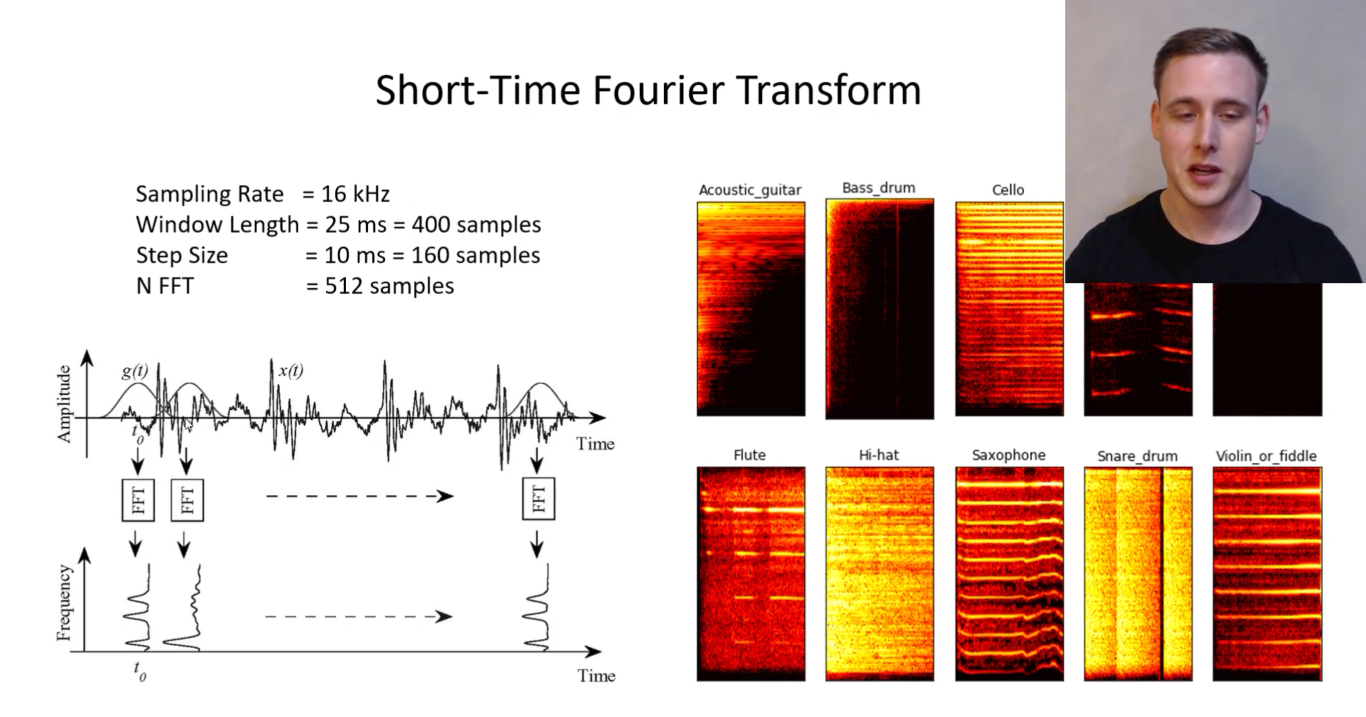

### Mel Filterbank
A Mel filterbank is a type of filter bank that is designed to mimic the human perception of sound. The human ear is more sensitive to lower frequencies and less sensitive to higher frequencies. A Mel filterbank takes this into account by dividing the frequency spectrum into bands that are spaced non-linearly, with narrower bands at lower frequencies and wider bands at higher frequencies.

Mel filterbanks are typically used in audio processing applications, such as speech recognition and music analysis. In speech recognition, Mel filterbanks are used to extract features from the audio signal that are discriminative for different phonemes. In music analysis, Mel filterbanks are used to extract features from the audio signal that can be used to identify different instruments, genres, and other musical characteristics.

A Mel filterbank is typically implemented as a set of triangular bandpass filters. The center frequencies of the filters are spaced according to the Mel scale, which is a logarithmic scale that is designed to mimic the human perception of pitch.

Once the Mel filterbank has been applied to the audio signal, the output is a set of coefficients that represent the energy in each frequency band. These coefficients can then be used as features for machine learning algorithms.

Mel filterbanks are a powerful tool for extracting features from audio signals that are discriminative for a variety of tasks. They are widely used in speech recognition, music analysis, and other audio processing applications.

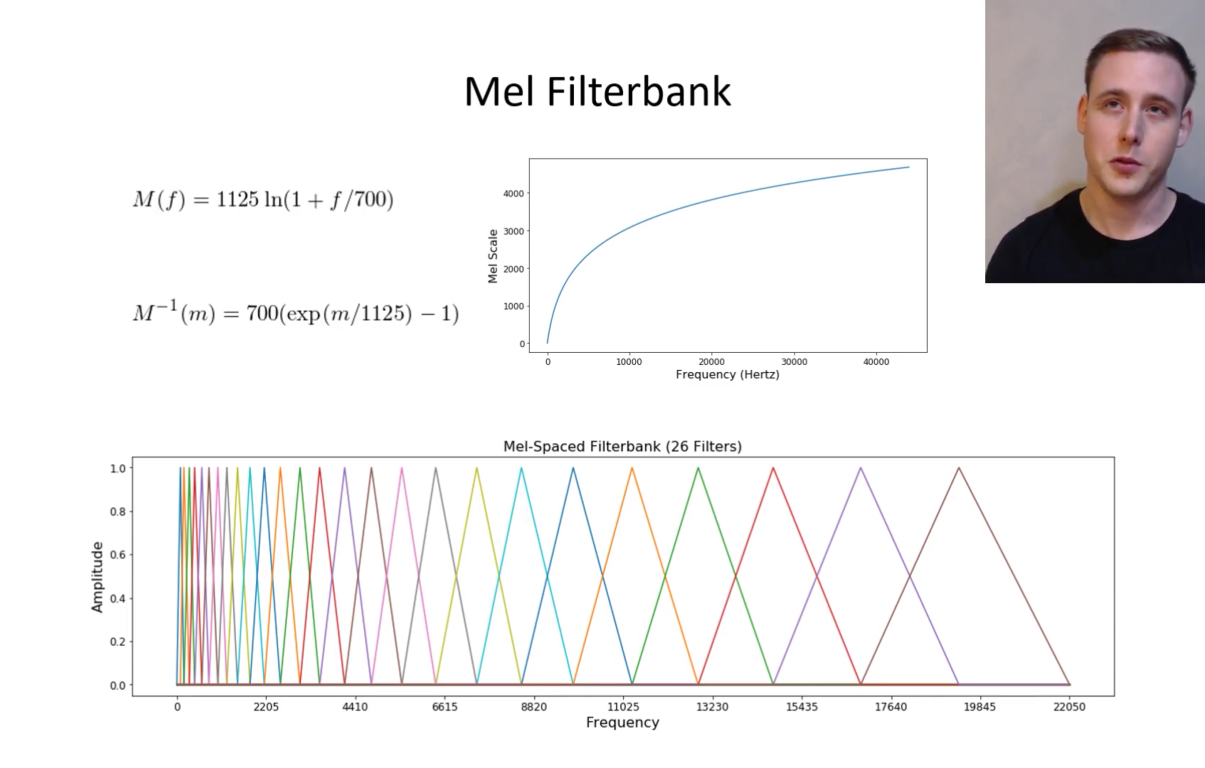

### Feature Engineering
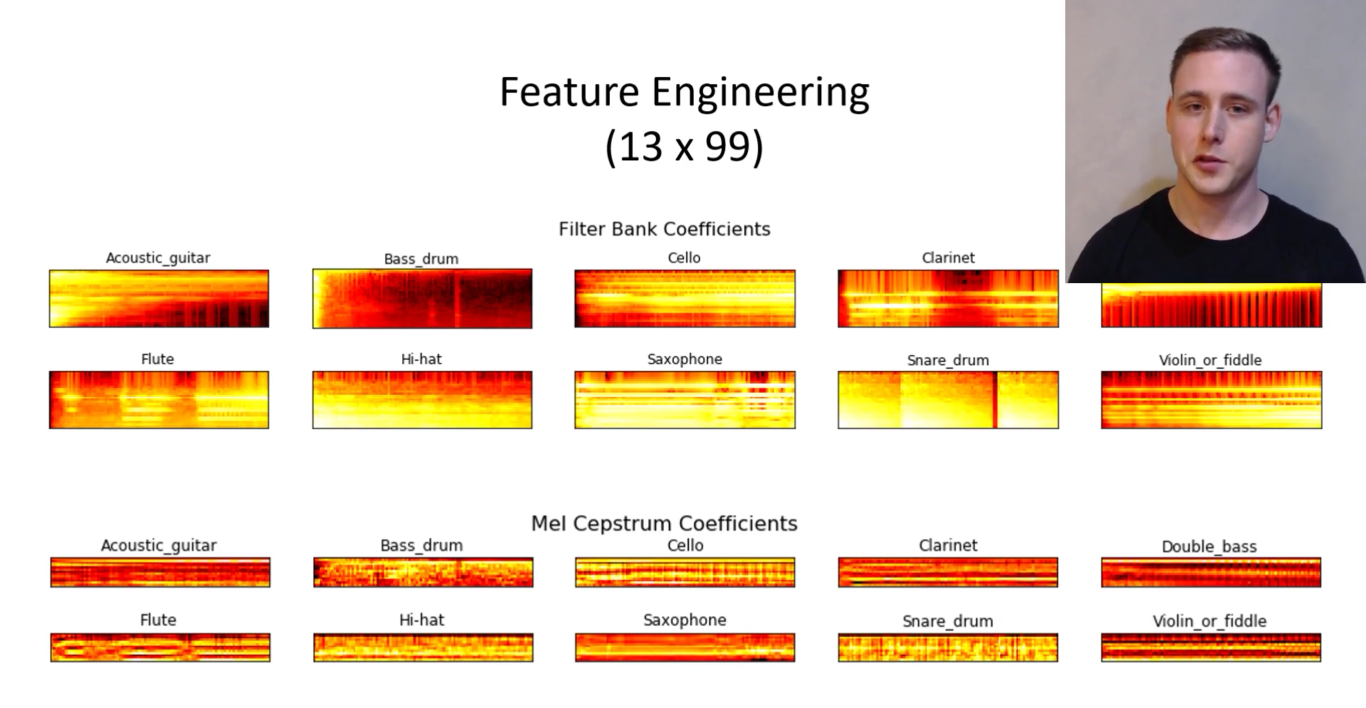

# Loading Data
* Video - https://www.youtube.com/watch?v=-GddLd2_0ok&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P&index=2
* Github Repo - https://github.com/seth814/Audio-Classification
* Data - https://www.kaggle.com/c/freesound-audio-tagging
* Python Speech Features - https://github.com/jameslyons/python_speech_features

In [1]:
import pandas as pd
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
df = pd.read_csv('/kaggle/input/freesound-audio-tagging/train.csv')
df.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [3]:
df.set_index('fname',inplace = True)

In [4]:
for f in df.index:
    rate , signal = wavfile.read('/kaggle/input/freesound-audio-tagging/audio_train/'+f)
    
    # Getting length of signal in seconds
    df.at[f , 'length'] = signal.shape[0]/rate
    
df.head()

,label,manually_verified,length
fname,,,
00044347.wav,Hi-hat,0,14.00
001ca53d.wav,Saxophone,1,10.32
002d256b.wav,Trumpet,0,0.44
0033e230.wav,Glockenspiel,1,8.00
00353774.wav,Cello,1,4.52


In [5]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()
print(class_dist)

label
Acoustic_guitar          10.430200
Applause                 11.632867
Bark                     11.196485
Bass_drum                 2.569667
Burping_or_eructation     3.353810
Bus                      15.634862
Cello                     7.453267
Chime                    12.405391
Clarinet                  6.947467
Computer_keyboard        11.602857
Cough                     5.524774
Cowbell                   3.437906
Double_bass               3.373467
Drawer_open_or_close      6.853544
Electric_piano           10.188400
Fart                      3.720800
Finger_snapping           3.018632
Fireworks                 9.638067
Flute                     9.237400
Glockenspiel              5.357660
Gong                      8.595822
Gunshot_or_gunfire        4.520952
Harmonica                 6.777697
Hi-hat                    3.718067
Keys_jangling             8.121871
Knock                     4.210538
Laughter                  7.266800
Meow                      7.236000
Microwave_oven

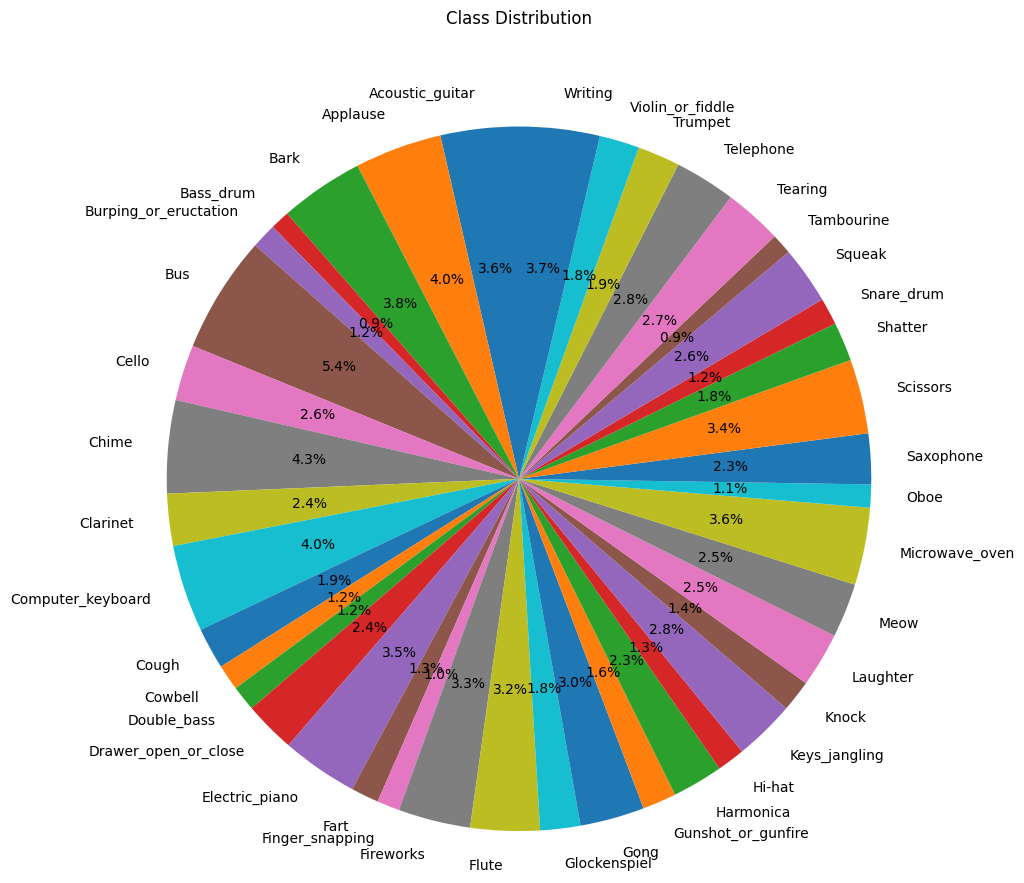

In [19]:
fig , ax = plt.subplots(figsize=(10,10))
ax.set_title('Class Distribution' , y=1.08)
ax.pie(class_dist , labels =class_dist.index , autopct = '%1.1f%%' , shadow = False , startangle = 90)
ax.axis('equal')
plt.show()
df.reset_index(inplace = True)

# Plotting & Cleaning

In [7]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=54e7655125ff4ebb7119567bb43dfa563c9a73fa6bc7029d8795596dbba02722
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [8]:
from python_speech_features import mfcc , logfbank

In [24]:
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows = 2 , ncols = 5 , sharex = False,  sharey = True , figsize = (20,5))
    fig.suptitle("Mel Frequency Cepstrum Coefficients" , size = 16)
    
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i] , cmap='hot',interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [32]:
def plot_signals(signals):
    fig , axes = plt.subplots(nrows = 2 , ncols = 5 , sharex = False , sharey = True , figsize = (20,5))
    fig.suptitle("Time Series" , size = 16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1            

In [26]:
def plot_fft(fft):
    fig , axes = plt.subplots(nrows = 2 , ncols = 5 , sharex = False , sharey = True , figsize = (20,5))
    fig.suptitle("Fourier Transform" , size = 16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y , freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [27]:
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows = 2 , ncols = 5 , sharex = False , sharey = True , figsize = (20,5))
    fig.suptitle("Filter Bank Coefficient" , size = 16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i] , cmap='hot',interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [28]:
import numpy as np

def calc_fft(signal , rate):
    n = len(signal)
    freq = np.fft.rfftfreq(n , d = 1/rate)
    Y = abs(np.fft.rfft(signal)/n)
    return (Y , freq)

In [16]:
import numpy as np
import pandas as pd

def envelope(signal , rate , threshold):
    mask = []
    signal = pd.Series(signal).apply(np.abs)
    y_mean = signal.rolling(window = int(rate/10) , min_periods = 1 , center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [31]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

for c in classes:
    wav_file = df[df.label == c].iloc[0,0]
    signal , rate = librosa.load('/kaggle/input/freesound-audio-tagging/audio_train/'+wav_file , sr = 44100)

    mask = envelope(signal , rate , 0.0005) # Playaround with thresh
    signal = signal[mask]
    signals[c] = signal 
    fft[c] = calc_fft(signal , rate)
    
    bank = logfbank(signal[:rate] , rate, nfilt = 26 , nfft = 1103).T # nfft calculated somehow
    fbank[c] = bank
    mel = mfcc(signal[:rate] , rate , numcep = 26 , nfft = 1103).T # numcep calculated somehow
    mfccs[c] = mel

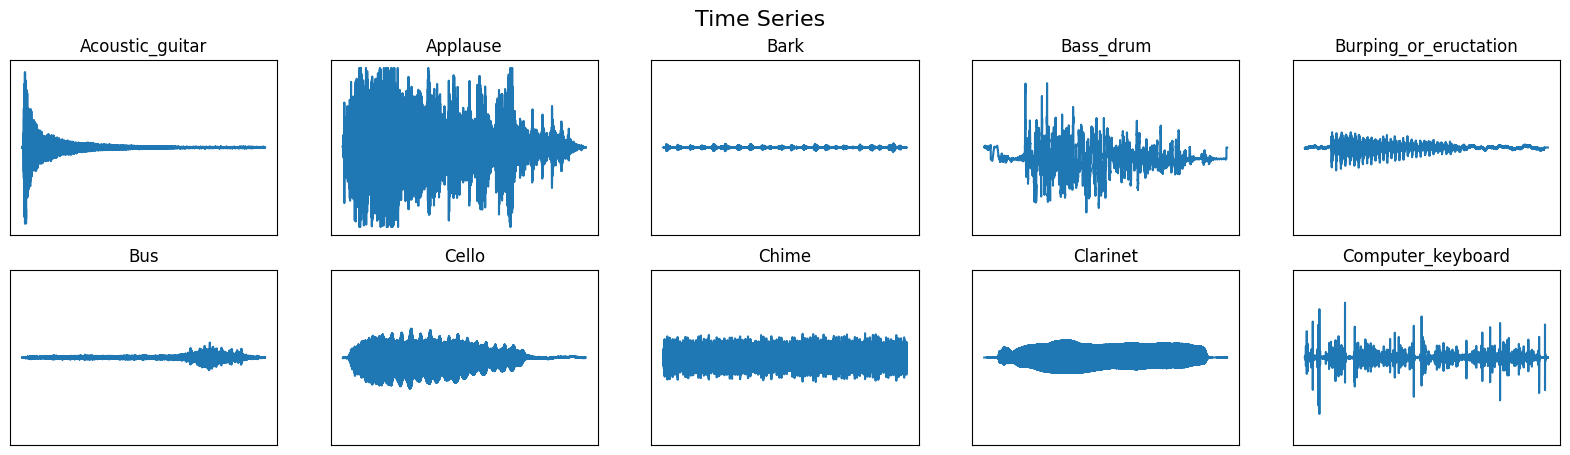

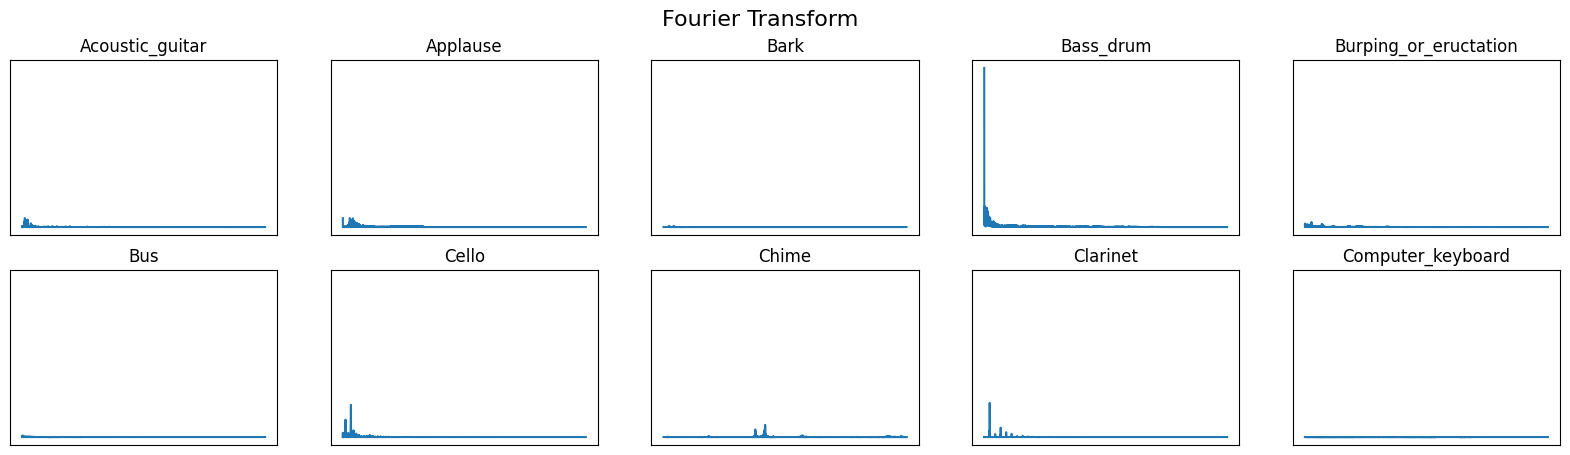

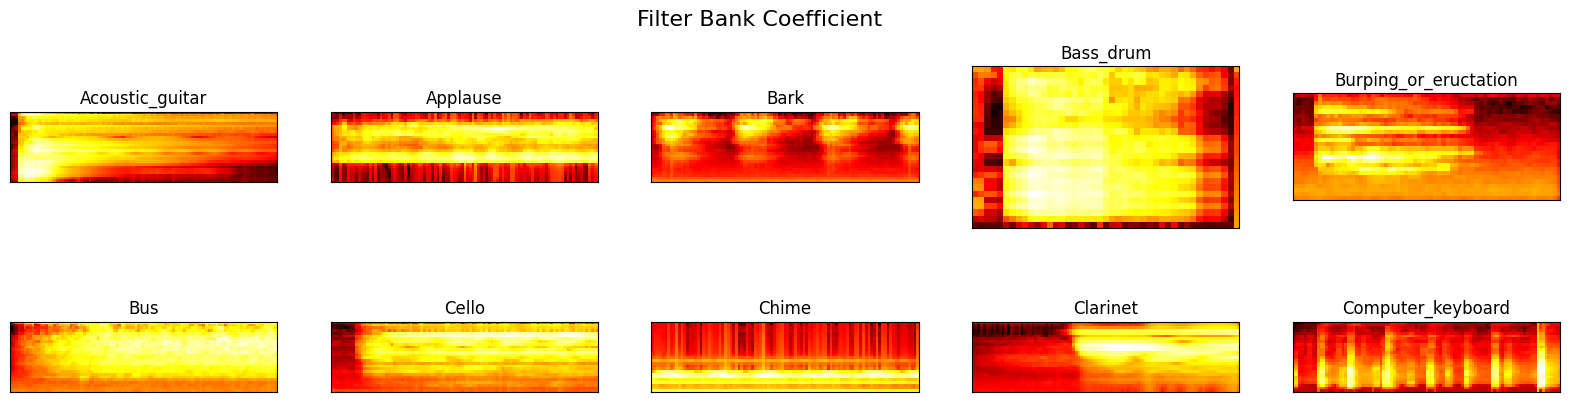

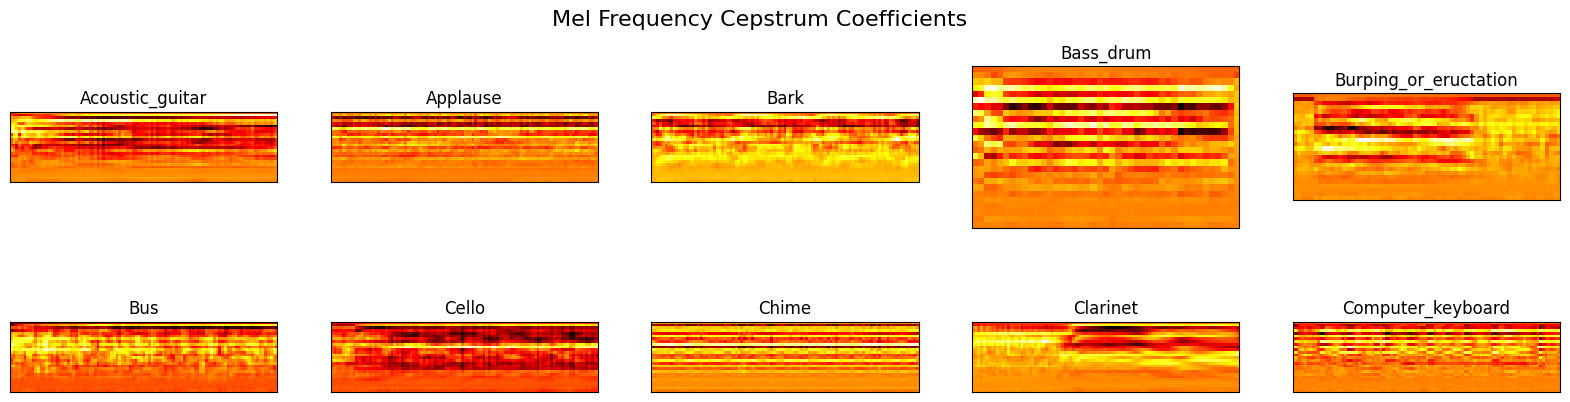

In [33]:
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [40]:
import os
from tqdm import tqdm

!mkdir clean
if len(os.listdir('clean')) == 0:
    for f in tqdm(df.fname):
        signal , rate = librosa.load('/kaggle/input/freesound-audio-tagging/audio_train/'+f , sr = 16000)
        mask = envelope(signal , rate , 0.0005)
        wavfile.write(filename = "clean/"+f,rate = rate , data = signal[mask])

mkdir: cannot create directory ‘clean’: File exists


100%|██████████| 9473/9473 [08:39<00:00, 18.25it/s]


# Model Preparation

In [134]:
from keras.utils import to_categorical

In [65]:
df.set_index('fname',inplace = True)

In [106]:
import numpy as np

for f in df.index:
    rate , signal = wavfile.read("/kaggle/working/clean/"+f)
    df.at[f,'length'] = signal.shape[0] / rate
    
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

n_samples = 2 * int(df['length'].sum()/ 0.1) 
prob_dist = class_dist / class_dist.sum()
print(prob_dist)
choices = np.random.choice(class_dist.index , p= prob_dist)

label
Acoustic_guitar          0.033644
Applause                 0.044862
Bark                     0.040314
Bass_drum                0.008749
Burping_or_eructation    0.010142
Bus                      0.061395
Cello                    0.028415
Chime                    0.044027
Clarinet                 0.025294
Computer_keyboard        0.041421
Cough                    0.015963
Cowbell                  0.008096
Double_bass              0.012203
Drawer_open_or_close     0.022537
Electric_piano           0.035452
Fart                     0.013548
Finger_snapping          0.005622
Fireworks                0.034994
Flute                    0.032962
Glockenspiel             0.011069
Gong                     0.028745
Gunshot_or_gunfire       0.015113
Harmonica                0.025564
Hi-hat                   0.012368
Keys_jangling            0.028132
Knock                    0.012166
Laughter                 0.026449
Meow                     0.025249
Microwave_oven           0.037039
Oboe    

In [129]:
class Config:
    def __init__(self , mode ='conv' , nfilt = 26 , nfeat = 13 , nfft = 512 , rate = 16000 ):
        self.mode = mode
        self.nfilt = nfilt
        self.nfeat = nfeat
        self.nfft = nfft
        self.rate = rate
        self.step = int(self.rate / 10)

In [135]:
def build_rand_feat():
    X = []
    y = []
    _min , _max = float("inf") , -float('inf')
    for _ in tqdm(range(n_samples)):
        rand_class = np.random.choice(class_dist.index , p = prob_dist)
        file = np.random.choice(df[df.label == rand_class].index)
        rate , wav = wavfile.read("/kaggle/working/clean/"+str(file))
        if wav.shape[0] >= config.step:
            label = df.at[file , 'label']
#             print(wav.shape[0]+1,"#",config.step , label)
            rand_index = np.random.randint(0 , wav.shape[0] - config.step)
            sample = wav[rand_index : rand_index + config.step]
            X_sample = mfcc(sample , rate , numcep = config.nfeat , nfilt=config.nfilt , nfft = config.nfft).T
            _min = min(np.amin(X_sample) , _min)
            _max = max(np.amax(X_sample) , _max)
            X.append(X_sample if config.mode == 'conv'else X_sample.T)
            y.append(classes.index(label))
    X,y = np.array(X) , np.array(y)
    X = (X - _min) / (_max - _min)
    
    if config.mode == 'conv':
        X = X.reshape(X.shape[0] , X.shape[1] , X.shape[2] , 1)
    elif config.mode == 'time':
        X = X.reshape(X.shape[0] , X.shape[1] , X.shape[2])
    y = to_categorical(y , num_classes = 10)
    return X , y    

# Building the model

## Convolutional Neural Network

In [ ]:
from sklearn.utils.class_weigth import compute_class_weight
import numpy as np

In [ ]:
def get_conv_model():
    model = Sequential()
    model.add(Conv2D(16, (3,3) , activation = 'relu' , strides = (1,1)  padding= 'same',input_shape = input_shape))
    model.add(Conv2D(32, (3,3) , activation = 'relu' , strides = (1,1)  padding= 'same',input_shape = input_shape))
    model.add(Conv2D(64, (3,3) , activation = 'relu' , strides = (1,1)  padding= 'same',input_shape = input_shape))
    model.add(Conv2D(128, (3,3) , activation = 'relu' , strides = (1,1)  padding= 'same',input_shape = input_shape))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128 , activation = 'relu'))
    model.add(Dense(64 , activation = 'relu'))
    model.add(Dense(10 , activation = 'softmax'))
    model.summary()
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics=['acc'])
    return model

In [ ]:
def get_recurrent_model():
    model = Sequential()
    # Shape of data for RNN is (n , time , feat)
    model.add(LSTM(128 , return_sequences = True , input_shape=input_shape))
    model.add(LSTM(128 , return_sequences = True ))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(64, activation = 'relu')))
    model.add(TimeDistributed(Dense(32, activation = 'relu')))
    model.add(TimeDistributed(Dense(16, activation = 'relu')))
    model.add(TimeDistributed(Dense(8, activation = 'relu')))
    model.add(Flatten())
    model.add(Dense(10 , activation = 'softmax'))
    model.summary()
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics=['acc'])

    return model

In [ ]:
config = Config(mode = 'conv')
if config.mode == 'conv':
    X , y = build_rand_feat()
    y_flat = np.argmax(y , axis = 1)
    input_shape = (X.shape[1] , X.shape[2] , 1)
    model=get_conv_model()
    
elif config.mode == "time":
    X , y = build_rand_feat()
    y_flat = np.argmax(y , axis = 1)
    input_shape = (X.shape[1] , X.shape[2])
    model=get_recurrent_model()

In [ ]:
class_weight = compute_class_weight('balance' , np.unique(y_flat) , y_flat)

model.fit(X,y,epochs = 10 , batch_size = 32 ,shuffle = True , class_weight = class_weight)

# Saving Data & Model (Not Tested)

In [ ]:
!mkdir models
!mkdir pickles

In [ ]:
%%writefile cfg.py

from keras.callbacks import ModelCheckpoint
import os

class Config:
    def __init__(self , mode ='conv' , nfilt = 26 , nfeat = 13 , nfft = 512 , rate = 16000 ):
        self.mode = mode
        self.nfilt = nfilt
        self.nfeat = nfeat
        self.nfft = nfft
        self.rate = rate
        self.step = int(self.rate / 10)
        self.model_path = os.path.join('models' , mode + '.model')
        self.p_path = os.path.join('pickles',mode + '.p') # Pickle file path

In [ ]:
def check_data():
    if os.path.isfie(config.p_path):
        print("Loading Existing data for {} model".format(config.mode))
        with open(config.p_path,'rb') as handle:
            tmp = pickle.load(handle)
            return tmp
    else:
        return None

In [ ]:
def build_rand_feat():
    tmp = check_data()
    if tmp:
        retrn tmp.data[0], tmp.data[1]
    
    X = []
    y = []
    _min , _max = float("inf") , -float('inf')
    for _ in tqdm(range(n_samples)):
        rand_class = np.random.choice(class_dist.index , p = prob_dist)
        file = np.random.choice(df[df.label == rand_class].index)
        rate , wav = wavfile.read("/kaggle/working/clean/"+str(file))
        if wav.shape[0] >= config.step:
            label = df.at[file , 'label']
            rand_index = np.random.randint(0 , wav.shape[0] - config.step)
            sample = wav[rand_index : rand_index + config.step]
            X_sample = mfcc(sample , rate , numcep = config.nfeat , nfilt=config.nfilt , nfft = config.nfft).T
            _min = min(np.amin(X_sample) , _min)
            _max = max(np.amax(X_sample) , _max)
            
            # Change next line from previous one
            X.append(X_sample)
            y.append(classes.index(label))
    config.min = _min
    config.max = _max
    X,y = np.array(X) , np.array(y)
    X = (X - _min) / (_max - _min)
    
    if config.mode == 'conv':
        X = X.reshape(X.shape[0] , X.shape[1] , X.shape[2] , 1)
    elif config.mode == 'time':
        X = X.reshape(X.shape[0] , X.shape[1] , X.shape[2])
    y = to_categorical(y , num_classes = 10)
    
    config.data = (X,y)
    
    with open(config.p_path , 'wb') as handle:
        pickle.dump(config , hangle , protocol= 2)
    
    return X , y

In [ ]:
config = Config(mode = 'conv')
if config.mode == 'conv':
    X , y = build_rand_feat()
    y_flat = np.argmax(y , axis = 1)
    input_shape = (X.shape[1] , X.shape[2] , 1)
    model=get_conv_model()
    
elif config.mode == "time":
    X , y = build_rand_feat()
    y_flat = np.argmax(y , axis = 1)
    input_shape = (X.shape[1] , X.shape[2])
    model=get_recurrent_model()

In [ ]:
class_weight = compute_class_weight('balance' , np.unique(y_flat) , y_flat)

checkpoint = ModelCheckpoint(config.model_path , monitor = 'val_acc' , verbose = 1 , mode = 'max' , save_best_only = True , save_weights_only = False , period = 1)

model.fit(X,y,epochs = 10 , batch_size = 32 ,shuffle = True , class_weight = class_weight, validation_split = 0.1, callbacks = [checkpoint])

model.save(config.model_path)

# Make Prediction

In [ ]:
def build_prediction(audio_dir):
    y_true = []
    y_pred = []
    fn_prob = {}
    
    print("Extracting feateurs from audio")
    for fn in tqdm(os.listdir(audio_dir)):
        rate , wav = wavfile.read(os.path.join(audio_dir , fn))
        label = fn2class[fn]
        c = classes.index(label)
        y_prob = []
        
        for i in range(0, wav.shape[0] - config.step , config.step):
            sample = wav[i:i+config.step]
            x = mfcc(sample , rate , numcep = config.nfeat , nfilt = config.nfilt , nfft = config.nfft)
            x = (x - config.min) / (config.max - config.min) 
            
            if config.mode == 'conv':
                x = x.reshape(1,x.shape[0] , x.shape[1] , 1)
            elif config.mode == 'time':
                x = np.expand_dims(x , axis = 0)
            y_hat = model.predict(x)
            y_prob = append(y_hat)
            y_pred.append(np.argmax(y_hat))
            y_true.append(c)
            
        fn_prob[fn] = np.mean(y_prob,axis = 0).flatten()
        
    return y_true , y_pred , fn_prob
      
        
df = pd.read_csv('/kaggle/input/freesound-audio-tagging/train.csv')
classes = list(np.unique(df.label))
fn2class = dict(zip(df.fname , df.label))
p_path = os.path.join('pickles','conv.p')

with open(p_path , 'rb') as handle:
    config = pickle.load(handle)
    
model = load_model(config.model_path)

y_true , y_pred ,fn_prob = build_predictions('clean')

acc_score = accuracy_score(y_true , y_pred)

y_prob = []
for i, row in df.iterrows():
    y_prob = fn_prob[row.fname]
    y_probs.append(y_prob)
    
    for c , p in aip(classes , y_prob):
        df.at[i , c] = p

y_pred = [classes[np.argmax(y)] for y in y_probs]
df['y_pred'] = y_pred

df.to_csv('predictions.csv',index = False)